In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.duplicated().sum()
df.shape

(29020, 19)

In [8]:
df["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    13537
1     7981
2     7238
3      126
4       96
5       28
6       14
Name: count, dtype: int64

In [9]:
print(df.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


Our data is imbalanced

In [10]:
cat_cols = ['type_of_meal_plan','equired_car_parking_space','room_type_reserved',
'market_segment_type','repeated_guest','booking_status']

num_cols=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [11]:
len(cat_cols)
len(num_cols)

12

DATA ANALYSIS

In [12]:
data=df.copy()

UNIVARIATE ANALYSIS

In [15]:

def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/3132331976.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/3132331976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/3132331976.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/3132331976.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

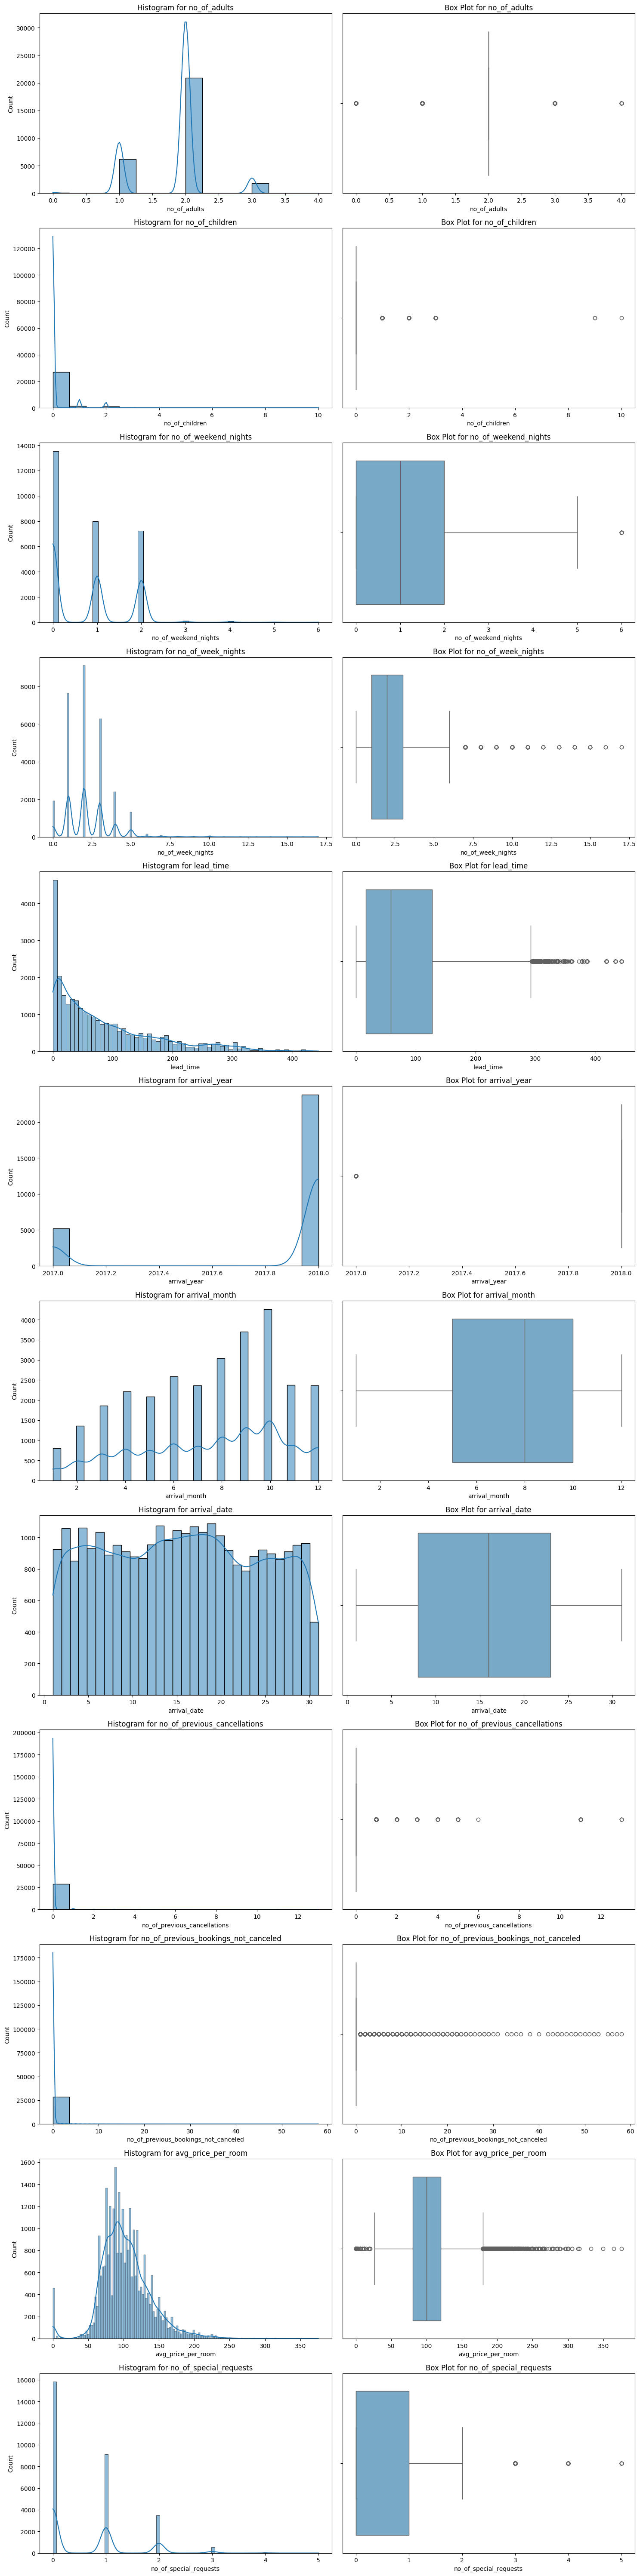

In [16]:
num_plot_dist(data , num_cols)

BIVARIATE ANALYSIS

In [17]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()


/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/1602734245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/1602734245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
/var/folders/fs/j49w7r9x7915tqkhmq5q7kgr0000gn/T/ipykernel_39955/1602734245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palett

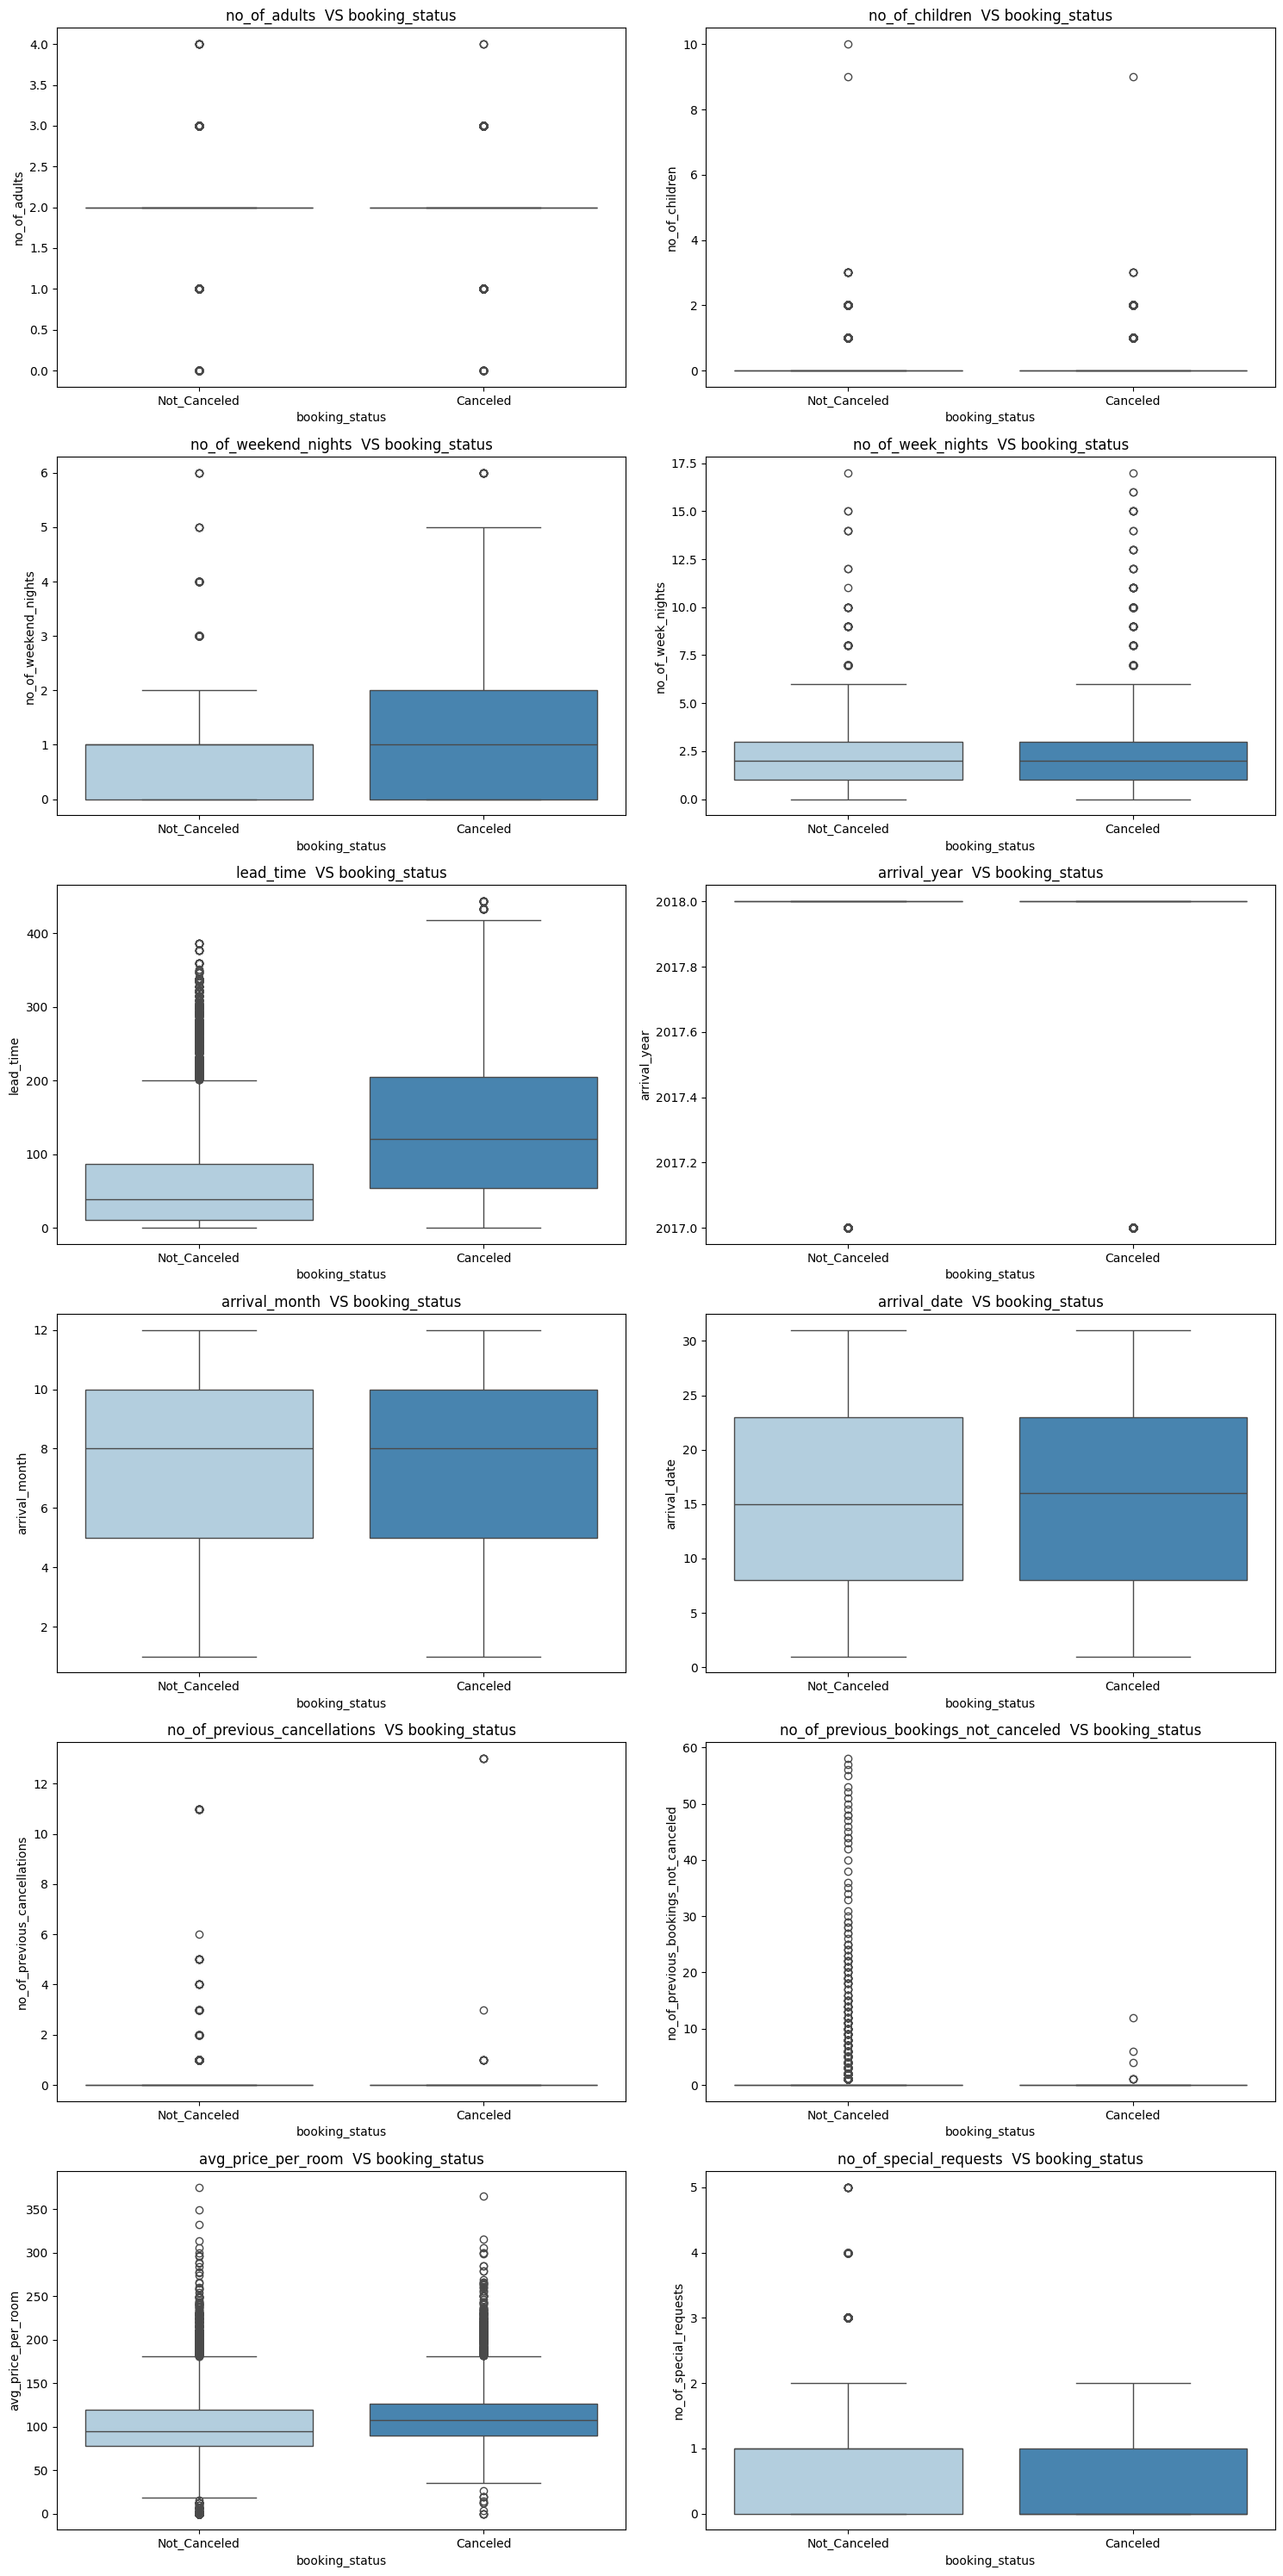

In [18]:
plot_bivariate_num(data , 'booking_status' , num_cols)

DATA PROCESSING

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [29]:
#### label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    



In [28]:
cat_cols = [
    'type_of_meal_plan',
    'required_car_parking_space',   # ✅ corrected
    'room_type_reserved',
    'market_segment_type',
    'booking_status'
]

In [30]:
mappings

{'type_of_meal_plan': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1),
  np.int64(2): np.int64(2),
  np.int64(3): np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  int64  
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  int64  
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [ ]:
##Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
df=df.drop(columns=['Booking_ID'])

In [40]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [ ]:
vif_data
##our data do not have any multicollinearity


,feature,VIF
0,const,3.585767e+07
1,no_of_adults,1.295419e+00
2,no_of_children,1.257749e+00
3,no_of_weekend_nights,1.062324e+00
4,no_of_week_nights,1.086849e+00
5,type_of_meal_plan,1.155976e+00
6,required_car_parking_space,1.036866e+00
7,room_type_reserved,1.530014e+00
8,lead_time,1.440424e+00
9,arrival_year,1.297431e+00


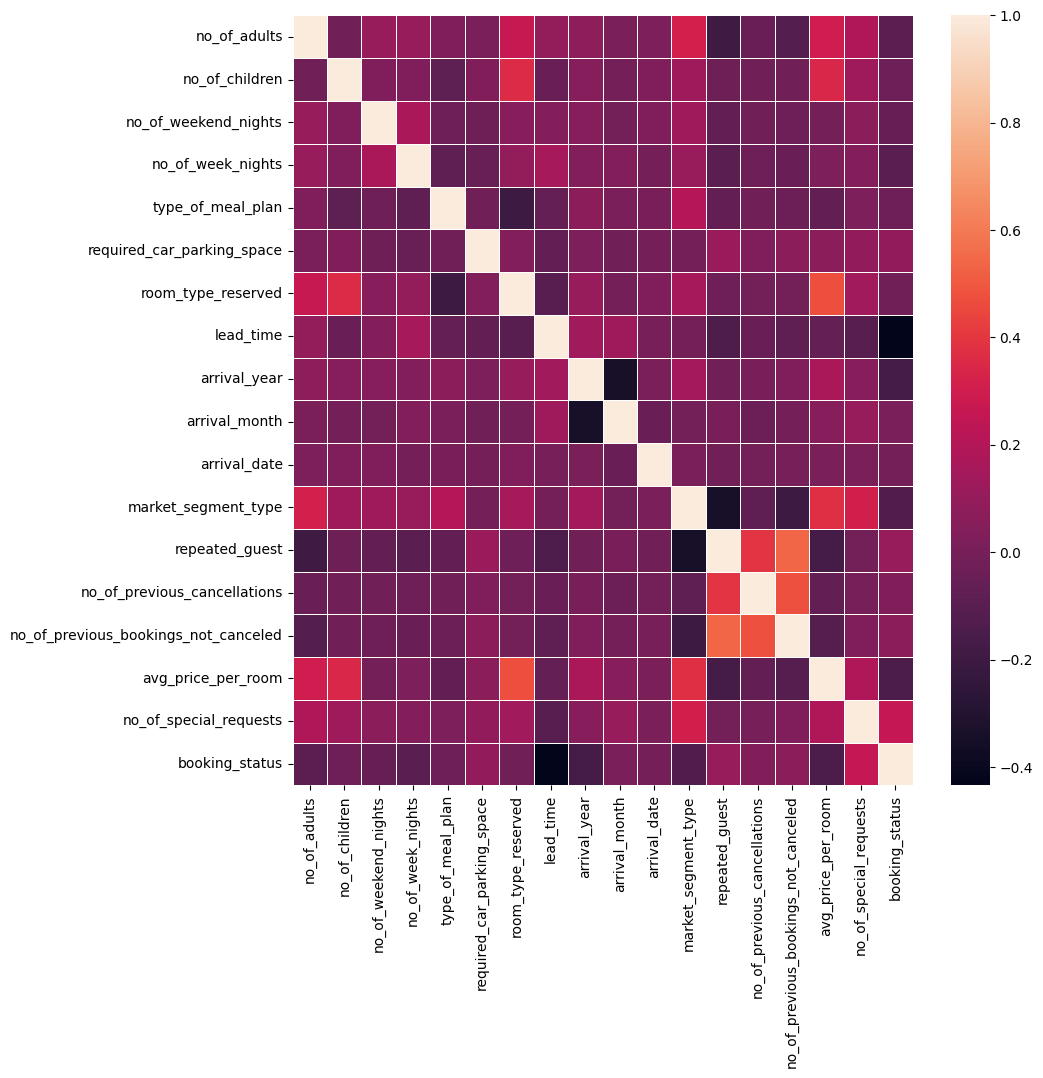

In [49]:
corr = df.corr()

# plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.5)
plt.show()

In [61]:
###Skewness
skewness= df.skew()
skewness


no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            14.550045
no_of_previous_bookings_not_canceled     8.897196
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [60]:
##log transformation
for col in df.columns:
    if skewness[col]>5:
        df[col]=np.log1p(df[col])

In [62]:
##balancing imabalanced data
df["booking_status"].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [ ]:
X=df.drop(columns='booking_status')
y=df['booking_status']

In [64]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_res ,y_res= smote.fit_resample(X,y)

/Users/abhayparekh/Documents/mlops_project1/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [70]:
y_res.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [72]:
balanced_df=pd.DataFrame(X_res,columns=X.columns)
balanced_df["booking_status"]=y_res

In [73]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [74]:
df=balanced_df.copy()

In [76]:
####Feature selection
from sklearn.ensemble import RandomForestClassifier
X=df.drop(columns="booking_status")
y=df["booking_status"]


In [77]:
model= RandomForestClassifier(random_state=42)
model.fit(X,y)


RandomForestClassifier(random_state=42)

In [78]:
feature_importance=model.feature_importances_

In [79]:
feature_importance_df=pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [82]:
top_important_feature_df=feature_importance_df.sort_values(by="importance",ascending=False)
top_important_feature_df

,feature,importance
7,lead_time,0.301180
15,avg_price_per_room,0.151418
16,no_of_special_requests,0.141942
9,arrival_month,0.086835
10,arrival_date,0.082630
11,market_segment_type,0.055215
3,no_of_week_nights,0.044618
2,no_of_weekend_nights,0.032394
8,arrival_year,0.023194
0,no_of_adults,0.021501


In [84]:
top_10_features=top_important_feature_df["feature"].head(10)
top_10_df=df[top_10_features.tolist() + ["booking_status"]]

In [85]:
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,10,17,4,1,2,2017,2,1
1,98,121.50,2,7,16,4,1,1,2018,2,1
2,433,70.00,0,9,8,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,6,15,3,2,0,2018,1,0


In [86]:
df=top_10_df.copy()

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [95]:

X = df.drop(columns='booking_status')
y = df["booking_status"]

In [96]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [98]:
##TRAIN OUR MODEL

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [100]:

rf = RandomForestClassifier(random_state=42)
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}


In [101]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)


In [102]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.5s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e22da90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e22d430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e229190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15e229b20>},
                   random_state=42, scoring='accuracy', verbose=2)

In [103]:
best_rf_model=random_search.best_estimator_

In [105]:

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


In [106]:
accuracy,precision,recall,f1

(0.911136683288582, 0.9046177138531416, 0.9187596104561763, 0.9116338207247299)

In [107]:
import joblib
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [108]:
loaded_model= joblib.load("random_forest.pkl")